# 붓꽃 분류 (텐서플로 1.x)

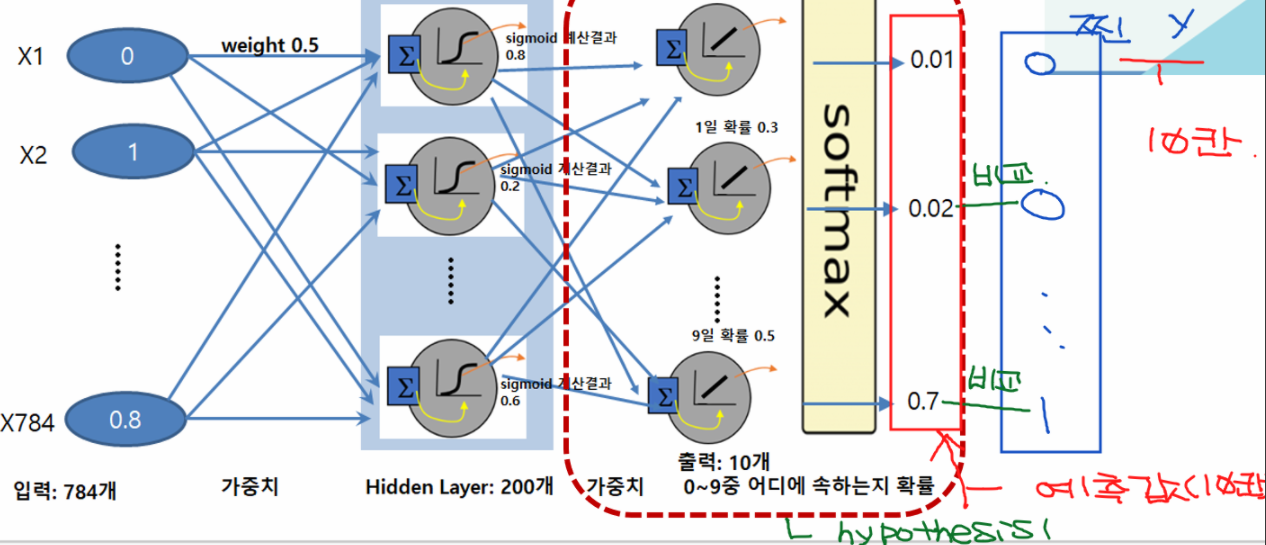

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data

X = np.array(X , dtype="float32")

y = iris.target

y = y.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
# one_hotEncoder 
# [2] - >[0., 0., 1.]
# [1] - >[0, 1,  0]
# 형태로 바꿔줌

enc = OneHotEncoder()

enc.fit(y_train)

# 결과값 보고 싶으면 toarray()
enc.transform(y_train).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0

In [ ]:
# y_train 인코딩
y_train_onehot = enc.transform(y_train).toarray()

# 타입변경
y_train_onehot = np.array(y_train_onehot, dtype = 'float32')

In [ ]:
print("y.shape",y_train.shape)
print("y_train.shape;",y_train_onehot.shape)

y.shape (112, 1)
y_train.shape; (112, 3)


In [ ]:
# 스케일링
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
w0 = tf.Variable(initializer([4, 16]))
b0 = tf.Variable(initializer([16]))

In [ ]:
# 1차 예측
hypothesis0 = tf.matmul(X_train, w0) + b0

hypothesis0 = tf.sigmoid(hypothesis0)

In [ ]:
# 기술통계값을 한번에 계산해주는 describe
# nobs : 데이터 개수
# minmax : 최소, 최댓값
# mean : 평균
# variance : 비편향 분산
# skewness : 왜도
# kurtosis : 첨도

stats.describe(hypothesis0)

DescribeResult(nobs=112, minmax=(array([0.343072  , 0.1694566 , 0.09018782, 0.15672678, 0.2772367 ,
       0.39113048, 0.2714693 , 0.14632854, 0.3031639 , 0.2706077 ,
       0.32535815, 0.32904345, 0.3357314 , 0.13809466, 0.32399106,
       0.10954282], dtype=float32), array([0.58167154, 0.80869675, 0.9507096 , 0.7594218 , 0.54063094,
       0.64493   , 0.78419876, 0.89666   , 0.93649197, 0.5769464 ,
       0.70663023, 0.6301437 , 0.87105966, 0.84365773, 0.80461466,
       0.89169806], dtype=float32)), mean=array([0.446547  , 0.4798734 , 0.52324075, 0.4808467 , 0.4292004 ,
       0.518197  , 0.5731929 , 0.55441177, 0.5764759 , 0.4383121 ,
       0.52967006, 0.5051437 , 0.56893164, 0.4636581 , 0.5901512 ,
       0.47258264], dtype=float32), variance=array([0.00339937, 0.04576528, 0.05496538, 0.01813173, 0.00367532,
       0.00265545, 0.01585447, 0.06541611, 0.03885383, 0.00579509,
       0.00826525, 0.00467509, 0.01755749, 0.02913014, 0.00818024,
       0.03097859], dtype=float32), skew

In [ ]:
w1 = tf.Variable(initializer([16,3]))
b1 = tf.Variable(initializer([3]))

In [ ]:
hypothesis1 = tf.matmul(hypothesis0, w1) + b1

hypothesis1 = tf.nn.softmax(hypothesis1)

# 오차
cost = -tf.reduce_mean(y_train_onehot * tf.log(hypothesis1))

print(cost)

tf.Tensor(0.47992548, shape=(), dtype=float32)


In [ ]:
optimizer = tf.train.AdamOptimizer(0.1)

for step in range(1001):
  print("=" * 100)
  print("step : ",step)
  with tf.GradientTape() as tape:
      hypothesis0 = tf.sigmoid(tf.matmul(X_train, w0) + b0)
      hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1 )
      
      cost = -tf.reduce_mean(y_train_onehot * tf.log(hypothesis1))
      print("cost = ", cost)  
      
      grads = tape.gradient(cost, [w0, w1, b0, b1])
      optimizer.apply_gradients(grads_and_vars = zip(grads, [w0, w1, b0, b1]))

step :  0
cost =  tf.Tensor(0.47992548, shape=(), dtype=float32)
step :  1
cost =  tf.Tensor(0.33393583, shape=(), dtype=float32)
step :  2
cost =  tf.Tensor(0.3181281, shape=(), dtype=float32)
step :  3
cost =  tf.Tensor(0.26893547, shape=(), dtype=float32)
step :  4
cost =  tf.Tensor(0.21748579, shape=(), dtype=float32)
step :  5
cost =  tf.Tensor(0.18597344, shape=(), dtype=float32)
step :  6
cost =  tf.Tensor(0.16919129, shape=(), dtype=float32)
step :  7
cost =  tf.Tensor(0.15660043, shape=(), dtype=float32)
step :  8
cost =  tf.Tensor(0.14377105, shape=(), dtype=float32)
step :  9
cost =  tf.Tensor(0.13061015, shape=(), dtype=float32)
step :  10
cost =  tf.Tensor(0.11832827, shape=(), dtype=float32)
step :  11
cost =  tf.Tensor(0.1079095, shape=(), dtype=float32)
step :  12
cost =  tf.Tensor(0.09972733, shape=(), dtype=float32)
step :  13
cost =  tf.Tensor(0.09363138, shape=(), dtype=float32)
step :  14
cost =  tf.Tensor(0.0891268, shape=(), dtype=float32)
step :  15
cost =  tf.T

In [ ]:
y_test

In [ ]:
pred = 

<tf.Variable 'Variable:0' shape=(4, 16) dtype=float32, numpy=
array([[ 0.4121063 ,  0.9551823 ,  0.74572486,  1.9171934 , -3.292327  ,
        -3.3528616 ,  1.6360679 , -0.96195674,  1.7308252 , -1.0173521 ,
         1.8499467 ,  3.525561  , -0.45539594, -2.094731  ,  0.13291103,
        -1.5416186 ],
       [ 7.238696  , -2.0333107 , -2.0467567 ,  1.5169678 ,  5.449348  ,
         5.3054237 , -1.6409553 ,  0.1723442 , -1.0205446 ,  1.6386861 ,
        -1.9604825 , -1.8274171 , -0.92120236,  0.23667449,  2.7229195 ,
         1.3798081 ],
       [-2.0587718 , -2.1452303 ,  1.4352742 , -8.718093  , -1.6812768 ,
        -1.2982767 ,  2.7306945 ,  3.3631263 ,  1.516314  , -2.403043  ,
         2.2063196 , -6.2671466 ,  4.2042108 ,  6.0479817 , -2.5987244 ,
        -1.9425746 ],
       [-1.2698584 , -2.5586522 ,  1.612643  , -6.031451  , -1.6865141 ,
        -1.4819503 ,  1.8510686 ,  2.7534635 ,  1.4356858 , -2.589902  ,
         2.085627  , -3.9126582 ,  3.8933237 ,  4.1559443 , -2.021453

# 딥러닝 MNIST (텐서플로 1.x)

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
# mnist 압축 파일 다운
# 이미지 리드할 객체 생성
mnist = input_data.read_data_sets('./mnist/data/')

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [ ]:
# mnist data는 미리 분류되어있음
# mnist 데이터중 . train 훈련셋에서 . next_batch(1) , 하나의 이미지 가져와라(랜덤으로)
image = mnist.train.next_batch(1)

print("숫자 ",image[1])
print("숫자 형태:\n",image[0])

숫자  [6]
숫자 형태:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.45882356 1.         0.33333334 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         

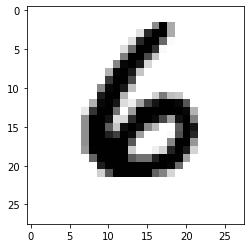

In [ ]:
# 흑백인데 칼라로 나옴  -> cmap사용
plt.imshow(image[0].reshape(28,28)).cmap = plt.cm.gray_r

In [ ]:
# one_hot = True : 원핫인코딩해서 생서
# 숫자가 3이면 = > [0 ,0, 0,1]
mnist = input_data.read_data_sets("./mnist/data/",one_hot = True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [ ]:
image = mnist.train.next_batch(1)

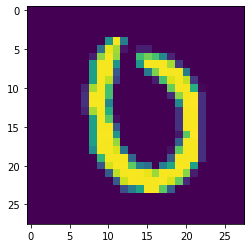

In [ ]:
plt.imshow(image[0].reshape(28 ,28))

In [ ]:
X, y = mnist.train.next_batch(10)

In [ ]:
X.shape

(10, 784)

In [ ]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
# cost가 0으로 빨리 수렴하는데 적절한 w,b 
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
# 1차 예측 
# weight
w0 = tf.Variable(initializer([784,200]))

# bias
b0 = tf.Variable(initializer([200]))

# 예측
hypothesis0 = tf.matmul(X,w0) +b0

# sigmoid 함수
hypothesis0 = tf.sigmoid(hypothesis0)

# shape 확인
print("X.shape :", X.shape)
print("w0.shape :", w0.shape)
print("예측.shape :",hypothesis0.shape)

X.shape : (10, 784)
w0.shape : (784, 200)
예측.shape : (10, 200)


In [ ]:
w1 = tf.Variable(initializer([200, 10]))
b1 = tf.Variable(initializer([10]))

# 예측
hypothesis1 = tf.matmul(hypothesis0,w1) +b1

# softmax 함수
hypothesis1 = tf.nn.softmax(hypothesis1)

# shape 확인
print("hypothesis0.shape :", hypothesis0.shape)
print("w1.shape :", w1.shape)
print("예측.shape :",hypothesis1.shape)

hypothesis0.shape : (10, 200)
w1.shape : (200, 10)
예측.shape : (10, 10)


In [ ]:
optimizer = tf.train.AdamOptimizer(0.001)

In [ ]:
X, y = mnist.train.next_batch(100)

# 1차 예측
hypothesis0 = tf.sigmoid(tf.matmul(X, w0)) + b0

# 2차 예측
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)

# 오차
cost = - tf.reduce_mean(y *tf.log(hypothesis1))
print("cost = ", cost)

cost =  tf.Tensor(0.26108366, shape=(), dtype=float32)


In [ ]:
for i in range(600):
    print("="*100)
    print("i = ", i)
    with tf.GradientTape() as tape:
      X, y = mnist.train.next_batch(100)
      hypothesis0 = tf.sigmoid(tf.matmul(X,w0)+b0)
      hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)

      cost = -tf.reduce_mean(y*tf.log(hypothesis1))
      print("cost =" , cost)
      print("="*100)
      grads = tape.gradient(cost, [w0, w1, b0, b1])
      optimizer.apply_gradients(grads_and_vars = zip(grads, [w0, w1,b0, b1]))

i =  0
cost = tf.Tensor(0.020977989, shape=(), dtype=float32)
i =  1
cost = tf.Tensor(0.018713364, shape=(), dtype=float32)
i =  2
cost = tf.Tensor(0.03131194, shape=(), dtype=float32)
i =  3
cost = tf.Tensor(0.046250783, shape=(), dtype=float32)
i =  4
cost = tf.Tensor(0.036449876, shape=(), dtype=float32)
i =  5
cost = tf.Tensor(0.030244116, shape=(), dtype=float32)
i =  6
cost = tf.Tensor(0.022721462, shape=(), dtype=float32)
i =  7
cost = tf.Tensor(0.018022068, shape=(), dtype=float32)
i =  8
cost = tf.Tensor(0.032865293, shape=(), dtype=float32)
i =  9
cost = tf.Tensor(0.021802504, shape=(), dtype=float32)
i =  10
cost = tf.Tensor(0.03012607, shape=(), dtype=float32)
i =  11
cost = tf.Tensor(0.02117667, shape=(), dtype=float32)
i =  12
cost = tf.Tensor(0.024695205, shape=(), dtype=float32)
i =  13
cost = tf.Tensor(0.029339239, shape=(), dtype=float32)
i =  14
cost = tf.Tensor(0.030514378, shape=(), dtype=float32)
i =  15
cost = tf.Tensor(0.026941873, shape=(), dtype=float32)
i =  

In [ ]:
for step in range(10):
  print("="  *100)
  print("step:", step)
  for i in range(600):
      print("="*100)
      print("i = ", i)
      with tf.GradientTape() as tape:
        X, y = mnist.train.next_batch(100)
        hypothesis0 = tf.sigmoid(tf.matmul(X,w0)+b0)
        hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)

        cost = -tf.reduce_mean(y*tf.log(hypothesis1))
        print("cost =" , cost)
        print("="*100)
        grads = tape.gradient(cost, [w0, w1, b0, b1])
        optimizer.apply_gradients(grads_and_vars = zip(grads, [w0, w1,b0, b1]))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
i =  551
cost = tf.Tensor(0.0063964576, shape=(), dtype=float32)
i =  552
cost = tf.Tensor(0.010496906, shape=(), dtype=float32)
i =  553
cost = tf.Tensor(0.009165799, shape=(), dtype=float32)
i =  554
cost = tf.Tensor(0.002026528, shape=(), dtype=float32)
i =  555
cost = tf.Tensor(0.004295039, shape=(), dtype=float32)
i =  556
cost = tf.Tensor(0.0016995755, shape=(), dtype=float32)
i =  557
cost = tf.Tensor(0.005746923, shape=(), dtype=float32)
i =  558
cost = tf.Tensor(0.006188687, shape=(), dtype=float32)
i =  559
cost = tf.Tensor(0.0045865495, shape=(), dtype=float32)
i =  560
cost = tf.Tensor(0.006058526, shape=(), dtype=float32)
i =  561
cost = tf.Tensor(0.0013344035, shape=(), dtype=float32)
i =  562
cost = tf.Tensor(0.003912617, shape=(), dtype=float32)
i =  563
cost = tf.Tensor(0.008933194, shape=(), dtype=float32)
i =  564
cost = tf.Tensor(0.008032819, shape=(), dtype=float32)
i =  565
cost = tf.Tensor(0.0019935118, shape=(), dtype=float32)

In [ ]:
test_image  = mnist.test.images[0:1]

In [ ]:
hypothesis0 = tf.sigmoid(tf.matmul(test_image, w0) + b0)

hypothesis1 =  tf.nn.softmax(tf.matmul(hypothesis0,w1) + b1)

In [ ]:
hypothesis1

<tf.Tensor: id=494129, shape=(1, 10), dtype=float32, numpy=
array([[2.2076072e-06, 5.0687319e-08, 1.5462439e-05, 8.0109260e-04,
        2.4107791e-07, 2.5945524e-06, 2.1691281e-10, 9.9912316e-01,
        2.1158547e-05, 3.4091103e-05]], dtype=float32)>

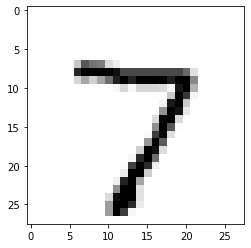

In [ ]:
plt.imshow(test_image.reshape(28,28),cmap = 'Greys')

# 실습

## 다중 분류를 이용한 붓꽃 데이터 분류 (텐서플로 1.x)

- 317 ~ 345

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
data = datasets.load_iris()

In [ ]:
X = data.data

X = np.array(X , dtype="float32")

y = data.target

y = y.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
# one_hotEncoder 
enc = OneHotEncoder()

enc.fit(y)

# 결과값 보고 싶으면 toarray()
y_train_onehot = enc.transform(y_train).toarray()

# 타입변경
y_train_onehot = np.array(y_train_onehot, dtype = 'float32')

# 테스트 셋 인코딩
y_test_onehot = enc.transform(y_test).toarray()

# 형변환
y_test_onehot = np.array(y_test_onehot, dtype = 'float32')

In [ ]:
# 스케일링
# X에서 평균 빼고 표준편차로 나눠서 평균 -> 0 , 표준편차 ->1 로 반환
scaler = StandardScaler()

# X_train 평균, 표준 편차 계산
scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
initializer = tf.contrib.layers.xavier_initializer()

# 1차 예측에 필요한 Weight, bias
w0 = tf.Variable(initializer([4, 16]))

b0 = tf.Variable(initializer([16]))

# 2차 예측에 필요한 Weight, bias
w1 = tf.Variable(initializer([16,3]))

b1 = tf.Variable(initializer([3]))

In [ ]:
y_train.shape

(112, 1)

In [ ]:
optimizer = tf.train.AdamOptimizer(0.1)

for step in range(1001):
  with tf.GradientTape() as tape:
      # 1차 예측
      hypothesis0 = tf.sigmoid(tf.matmul(X_train, w0) + b0)

      # 2차 예측
      hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1 )
      
      # 오차
      cost = -tf.reduce_mean(y_train_onehot * tf.log(hypothesis1))
      
      # 기울기 수정값
      grads = tape.gradient(cost, [w0, w1, b0, b1])
      
      # 기울기 업데이트
      optimizer.apply_gradients(grads_and_vars = zip(grads, [w0, w1, b0, b1]))

      if step % 100 == 0:
        print("="*50)
        print("step : {}, cost : {}".format(step, cost.numpy()))
        print("="*50)


step : 0, cost : 0.3472861349582672
step : 100, cost : 0.015639910474419594
step : 200, cost : 0.01482003927230835
step : 300, cost : 0.013498549349606037
step : 400, cost : 0.008899458684027195
step : 500, cost : 0.0016498801996931434
step : 600, cost : 0.0007052632863633335
step : 700, cost : 0.0004249882185831666
step : 800, cost : 0.0002929820620920509
step : 900, cost : 0.00021731869492214173
step : 1000, cost : 0.0001689202181296423


In [ ]:
# 테스트 셋 스케일링
X_test = scaler.transform(X_test)

# 예측 1
hypothesis0 = tf.sigmoid(tf.matmul(X_test, w0) + b0)

# 예측2
predict = tf.nn.softmax(tf.matmul(hypothesis0, w1) + b1)

# 각 줄에서 최대값의 인덱스 리턴
predict01 = tf.argmax(predict, 1)

# 정답 셋에서 각 줄의 최댓값 인덱스 리턴
target = tf.argmax(y_test_onehot, 1)

# 맞으면 True, 틀리면 False
ac01 = tf.equal(predict01, target)

# True -> 1 , False - 0
ac02 = tf.cast(ac01, dtype = 'float32')

# 정확도 측정
ac03 = tf.reduce_mean(ac02)

print("정확도 : ",ac03)

정확도 :  tf.Tensor(0.5, shape=(), dtype=float32)


## 다중 분류를 이용한 붓꽃 데이터 분류 (텐서플로 2.x)

- 346 ~ 368

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
data = datasets.load_iris()

In [ ]:
X = data.data

y = data.target

y = y.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
# 스케일링
# X에서 평균 빼고 표준편차로 나눠서 평균 -> 0 , 표준편차 ->1 로 반환
scaler = StandardScaler()

# X_train 평균, 표준 편차 계산
scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
# one_hotEncoder 
enc = OneHotEncoder()

enc.fit(y)

# 결과값 보고 싶으면 toarray()
y_train_onehot = enc.transform(y_train).toarray()

# 타입변경
y_train_onehot = np.array(y_train_onehot, dtype = 'float32')

# 테스트 셋 인코딩
y_test_onehot = enc.transform(y_test).toarray()

# 형변환
y_test_onehot = np.array(y_test_onehot, dtype = 'float32')

In [ ]:
model = Sequential()

# 출력 칸수 16, 입력칸수 4
model.add(Dense(16, input_dim = 4, activation = 'sigmoid'))


model.add(Dense(3, activation = 'softmax'))

model.summary()

model.compile(
              loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate =0.1), 
              metrics = ['acc']
              )

model.fit(X_train, y_train_onehot, epochs = 1000)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 1s 5ms/step - loss: 0.9221 - acc: 0.5357
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4484 - acc: 0.8125
Epoch 3/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3342 - acc: 0.8661
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2547 - acc: 0.8929
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2197 - acc: 0.9018
Epoch 6/1000
4/4 [==============================] - 0s 

In [ ]:
# 테스트 셋 스케일링
X_test = scaler.transform(X_test)

predict = model.predict(X_test)

# 각 줄에서 최대값의 인덱스 리턴
predict01 = tf.argmax(predict, 1)

# 정답 셋에서 각 줄의 최댓값 인덱스 리턴
target = np.argmax(y_test_onehot, 1)

# 맞으면 True, 틀리면 False
predict02 = (predict01 == target)

# 정확도 측정
ac03 = np.sum(predict02)/len(predict02)
print("정확도 : ",ac03)

정확도 :  0.5


## 딥러닝 MNIST (텐서플로 1.x)

- 374 ~393

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [5]:
# mnist 압축 파일 다운
# 이미지 리드할 객체 생성
mnist = input_data.read_data_sets('./mnist/data/',one_hot = True)

Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
# cost가 0으로 빨리 수렴하는데 적절한 w,b 
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
# 1차 예측 
# weight
w0 = tf.Variable(initializer([784,200]))

# bias
b0 = tf.Variable(initializer([200]))

# 2차 예측 
# weight
w1 = tf.Variable(initializer([200,10]))

# bias
b1 = tf.Variable(initializer([10]))


In [ ]:
print("데이터 개수 : ",mnist.train.num_examples)

데이터 개수 :  55000


In [ ]:
batch_size = 100

total_batch = int(mnist.train.num_examples/batch_size)

print("total_batch =", total_batch)

total_batch = 550


In [ ]:
optimizer = tf.train.AdamOptimizer(0.001)

In [ ]:
for step in range(11):
  total_cost = 0

  for i in range(total_batch):


    X, y = mnist.train.next_batch(batch_size)
    with tf.GradientTape() as tape:
    
        hypothesis0 = tf.sigmoid(tf.matmul(X,w0)+b0)

        hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)

        cost = -tf.reduce_mean(y*tf.log(hypothesis1))

        grads = tape.gradient(cost, [w0, w1, b0, b1])

    optimizer.apply_gradients(grads_and_vars = zip(grads, [w0, w1,b0, b1]))

    total_cost += cost
  print("step: {}, cost:{}". format(step, total_cost/total_batch))

step: 0, cost:0.007736366242170334
step: 1, cost:0.006828421726822853
step: 2, cost:0.00588814215734601
step: 3, cost:0.005277530290186405
step: 4, cost:0.004499008879065514
step: 5, cost:0.004073257092386484
step: 6, cost:0.0034871597308665514
step: 7, cost:0.003060414921492338
step: 8, cost:0.0026792718563228846
step: 9, cost:0.002253956161439419
step: 10, cost:0.002043391577899456


In [ ]:
test_images =  mnist.test.images

test_labels = mnist.test.labels

hypothesis0 = tf.sigmoid(tf.matmul(test_images,w0)+b0)

predict = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)

# 각 줄에서 최대값의 인덱스 리턴
predict01 = tf.argmax(predict, 1)

# 정답 셋에서 각 줄의 최댓값 인덱스 리턴
target = tf.argmax(test_labels, 1)

ac01 = tf.equal(predict01, target)


ac02 = tf.cast(ac01, dtype = 'float32')

ac03 = tf.reduce_mean(ac02)

print("정확도 : ",ac03)

정확도 :  tf.Tensor(0.9791, shape=(), dtype=float32)


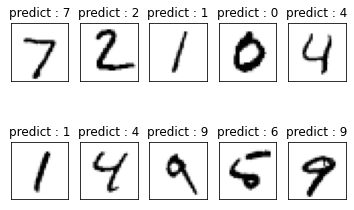

In [ ]:
fig = plt.figure()

for i in range(10):

  subplot = fig.add_subplot(2,5, i+1)

  # X축에 아무 데이터도 출력 안하기
  subplot.set_xticks([])

  # y축에 아무 데이터도 출력 안하기
  subplot.set_yticks([])

  # 이미지의 제목으로 예측한 이미지의 이름 출력
  subplot.set_title('predict : %d' % predict01[i])

  # 이미지 출력
  subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                 cmap ='Greys')
plt.show()

## 